In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RSCCASN.csv", parse_dates = True, index_col = 'DATE')

In [ ]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


<Axes: xlabel='DATE'>

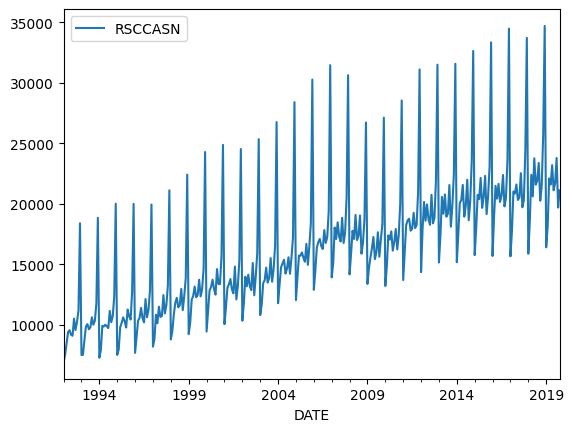

In [ ]:
df.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [ ]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

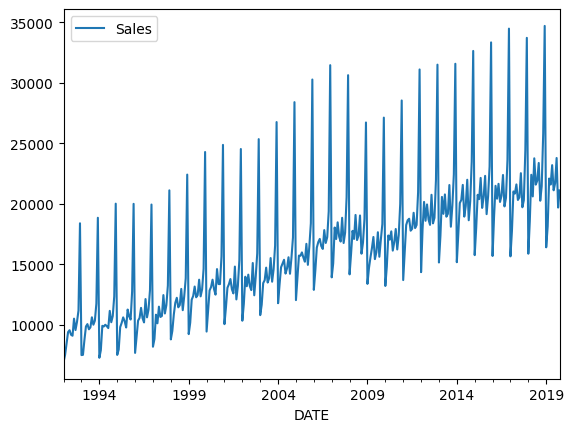

In [ ]:
df.plot()

In [ ]:
len(df)

334

In [ ]:
len(df)-18

316

In [ ]:
test_size = 18

In [ ]:
test_ind = len(df) - test_size

In [ ]:
test_ind

316

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [ ]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)

In [ ]:
scaled_test = scaler.fit_transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

18

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [ ]:
y

array([[0.02047633]])

In [ ]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [ ]:
len(X[0])

12

In [ ]:
y

array([[0.02047633]])

In [ ]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 1)

In [ ]:
model.fit(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/20
304/304 [==============================] - 5s 9ms/step - loss: 0.0261 - val_loss: 0.0139
Epoch 2/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0184 - val_loss: 0.0095
Epoch 3/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0111 - val_loss: 0.0234
Epoch 4/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 5/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 7/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 8/20
304/304 [==============================] - 3s 9ms/step - loss: 9.4282e-04 - val_loss: 8.2244e-04
Epoch 9/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 10/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0013 - val_l

<Axes: >

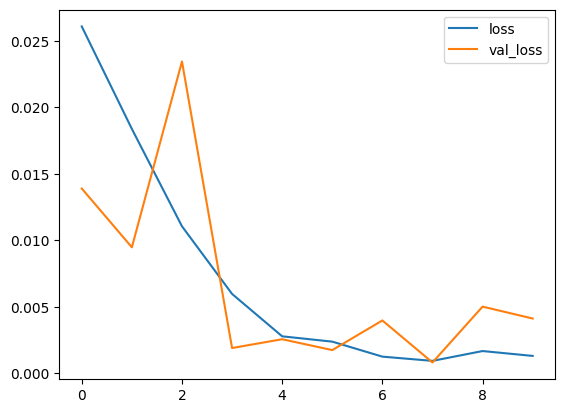

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 170ms/step


array([[0.5721306]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.40194578])

In [ ]:
test_predictions = []

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
current_batch

array([[[0.53252977],
        [0.48591345],
        [0.49364653],
        [0.56629393],
        [0.46405751],
        [0.48536886],
        [0.63534708],
        [0.97233517],
        [0.32468051],
        [0.42285071],
        [0.5615016 ],
        [0.49658728]]])

In [ ]:
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([0.5721306], dtype=float32),
 array([0.5252972], dtype=float32),
 array([0.53425974], dtype=float32),
 array([0.60763127], dtype=float32),
 array([0.5082018], dtype=float32),
 array([0.53319365], dtype=float32),
 array([0.6876662], dtype=float32),
 array([1.0208355], dtype=float32),
 array([0.37034172], dtype=float32),
 array([0.4644516], dtype=float32),
 array([0.6025668], dtype=float32),
 array([0.5368521], dtype=float32),
 array([0.6139684], dtype=float32),
 array([0.56604403], dtype=float32),
 array([0.5761758], dtype=float32),
 array([0.65158826], dtype=float32),
 array([0.5534462], dtype=float32),
 array([0.58260524], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-232-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

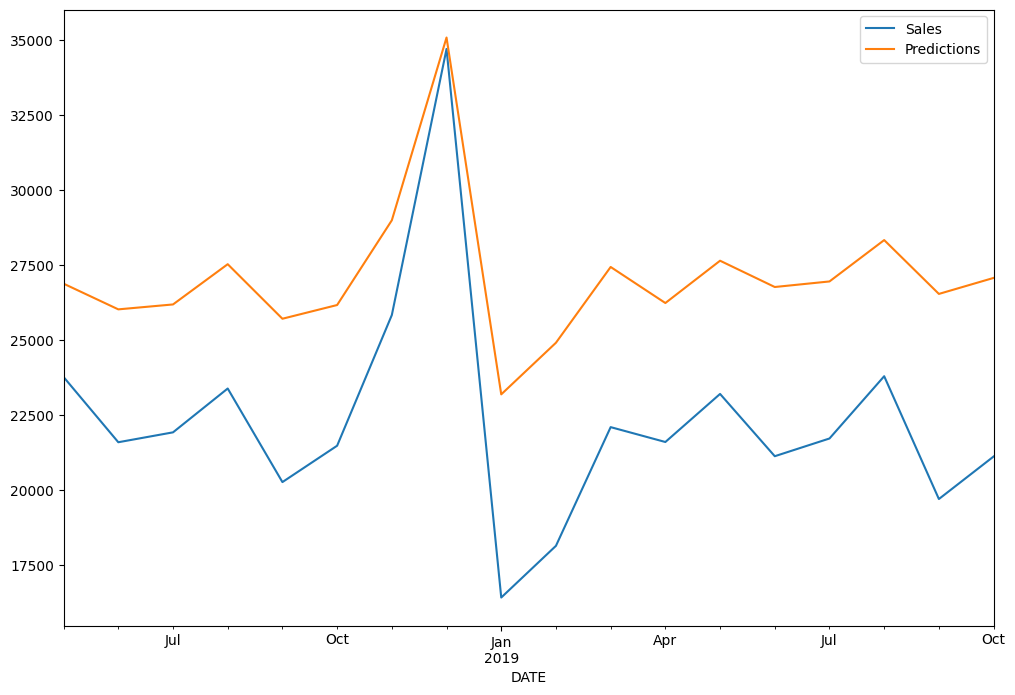

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length, batch_size = 1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'Adam', loss = 'mse')
model.fit_generator(generator, epochs = 8)

Epoch 1/8


<ipython-input-236-bcb4aeb7b11b>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 8)


322/322 [==============================] - 4s 8ms/step - loss: 0.0226
Epoch 2/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0175
Epoch 3/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0095
Epoch 4/8
322/322 [==============================] - 5s 15ms/step - loss: 0.0056
Epoch 5/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0031
Epoch 6/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0018
Epoch 7/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0019
Epoch 8/8
322/322 [==============================] - 3s 10ms/step - loss: 0.0014


In [ ]:
forcast = []
periods = 12
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  forcast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis = 1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
forcast = scaler.inverse_transform(forcast)

In [ ]:
forcast

array([[26352.11600351],
       [25555.86802053],
       [25706.94957304],
       [26958.76830673],
       [25245.73752832],
       [25663.22927189],
       [28295.94691801],
       [34575.9776063 ],
       [22780.4953208 ],
       [24492.45792842],
       [26850.65022993],
       [25732.16690969]])

In [ ]:
forcast_index = pd.date_range(start = '2019-11-01', periods = periods, freq = 'MS')

In [ ]:
forcast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forcast_df = pd.DataFrame(data = forcast, index = forcast_index, columns = ['Forecast'])

In [ ]:
forcast_df

,Forecast
2019-11-01,26352.116004
2019-12-01,25555.868021
2020-01-01,25706.949573
2020-02-01,26958.768307
2020-03-01,25245.737528
2020-04-01,25663.229272
2020-05-01,28295.946918
2020-06-01,34575.977606
2020-07-01,22780.495321
2020-08-01,24492.457928


<Axes: >

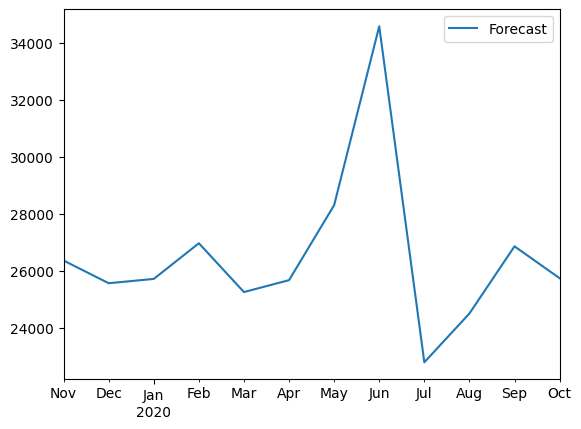

In [ ]:
forcast_df.plot()

<Axes: xlabel='DATE'>

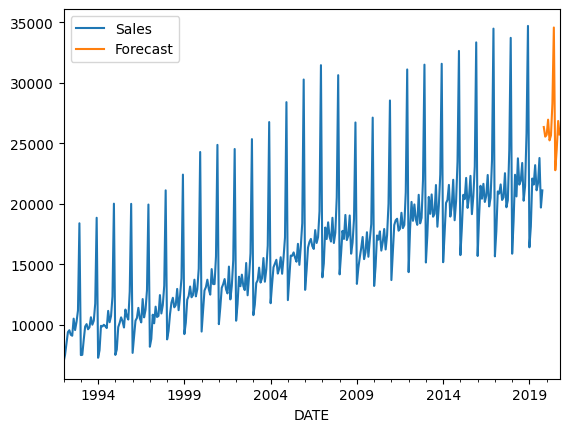

In [ ]:
ax = df.plot()
forcast_df.plot(ax = ax)

(576.0, 611.0)

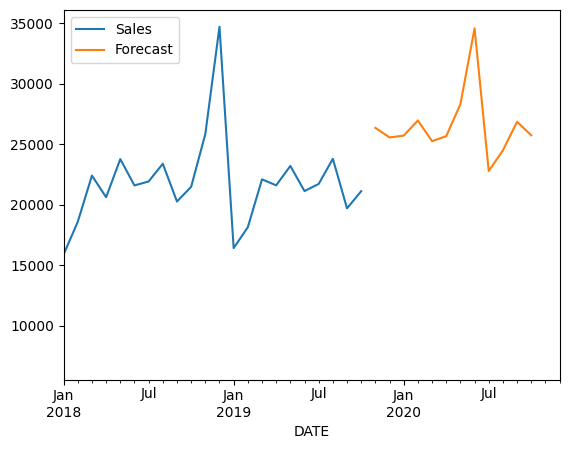

In [ ]:
ax = df.plot()
forcast_df.plot(ax = ax)
plt.xlim('2018-01-01', '2020-12-01')